In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector

# Loading Train Dataset

In [3]:
Data=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
Data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [4]:
type(Data)

pandas.core.frame.DataFrame

<!-- ******************************************Preprocessing*********************************************  -->

**Preprocessing Starts**

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

# Getting unique values for Categorical Columns of Train Data

In [6]:
print('number of unique values in Month_SeasonalPurchase:',Data['Month_SeasonalPurchase'].unique())
print('number of unique values in customer type:',Data['CustomerType'].unique())
print('number of unique values in Gender:',Data['Gender'].unique())
print('number of unique values in Cookies Setting:',Data['Cookies Setting'].unique())
print('number of unique values in Education:',Data['Education'].unique())
print('number of unique values in Marital Status:',Data['Marital Status'].unique())
print('number of unique values in Make Purchase:',Data['Made_Purchase'].unique())

number of unique values in Month_SeasonalPurchase: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' nan]
number of unique values in customer type: ['Returning_Visitor' 'New_Visitor' 'Other' nan]
number of unique values in Gender: ['Not Specified' 'Female' 'Male' nan]
number of unique values in Cookies Setting: ['Deny' 'ALL' 'Required' nan]
number of unique values in Education: ['Not Specified' 'Others' 'Diploma' 'Graduate' nan]
number of unique values in Marital Status: ['Other' 'Married' 'Single' nan]
number of unique values in Make Purchase: [False  True]


# Checking Null Values of Train Data

In [7]:
Data.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

# Replacing Null Values of Train Data

In [8]:
Data.replace('?', np.nan, inplace=True)
Data.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [9]:
Data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


# Visualisation of Dataset

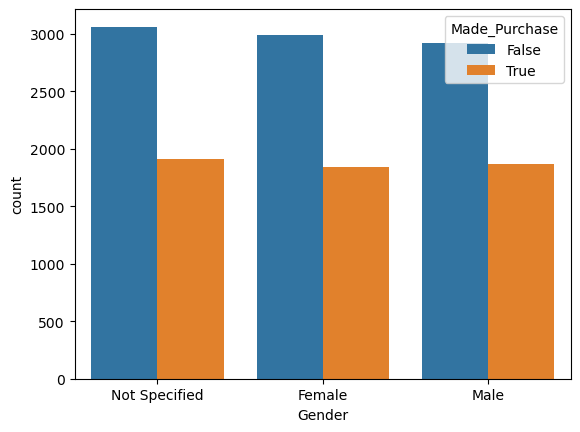

In [10]:
sns.countplot(data=Data, x='Gender', hue='Made_Purchase')
plt.show()

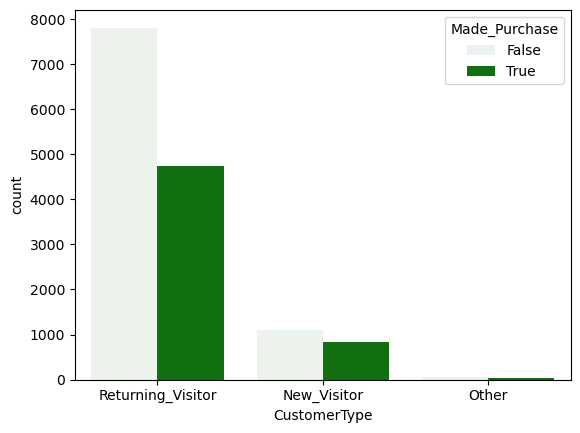

In [11]:
sns.countplot(data=Data, x='CustomerType', hue='Made_Purchase', color='g')
plt.show()

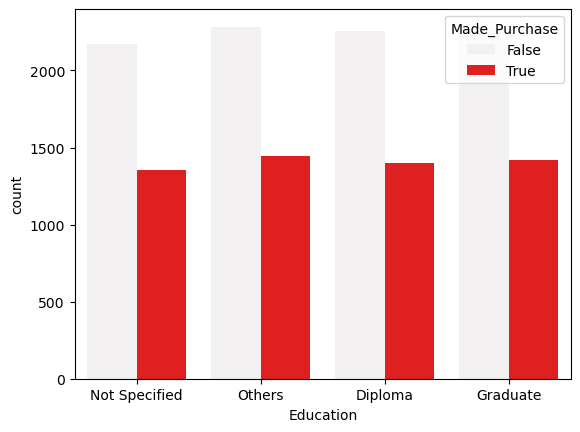

In [12]:
sns.countplot(data=Data, x='Education', hue='Made_Purchase', color='r')
plt.show()

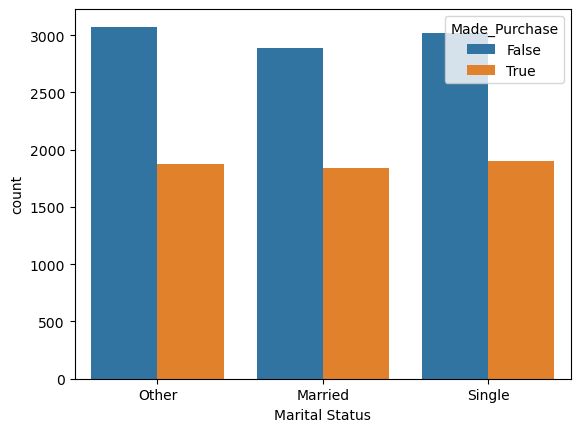

In [13]:
sns.countplot(data=Data, x='Marital Status', hue='Made_Purchase')
plt.show()

# Histogram Plot

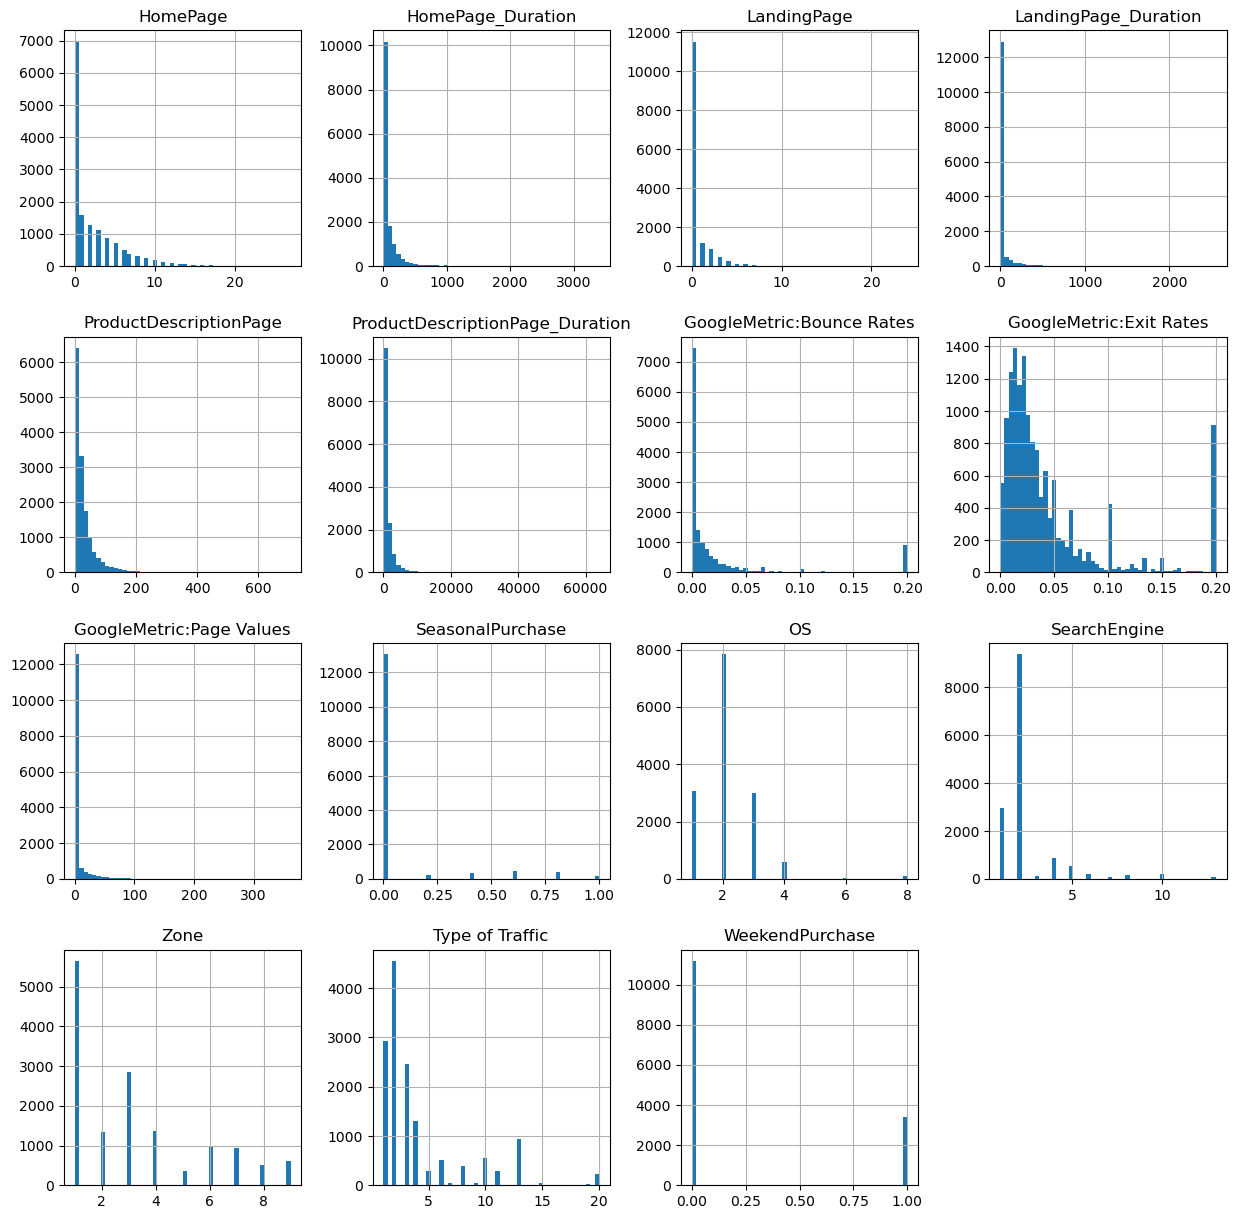

In [14]:
Data.hist(bins=50, figsize=(15,15))
plt.show()

# Heatmap

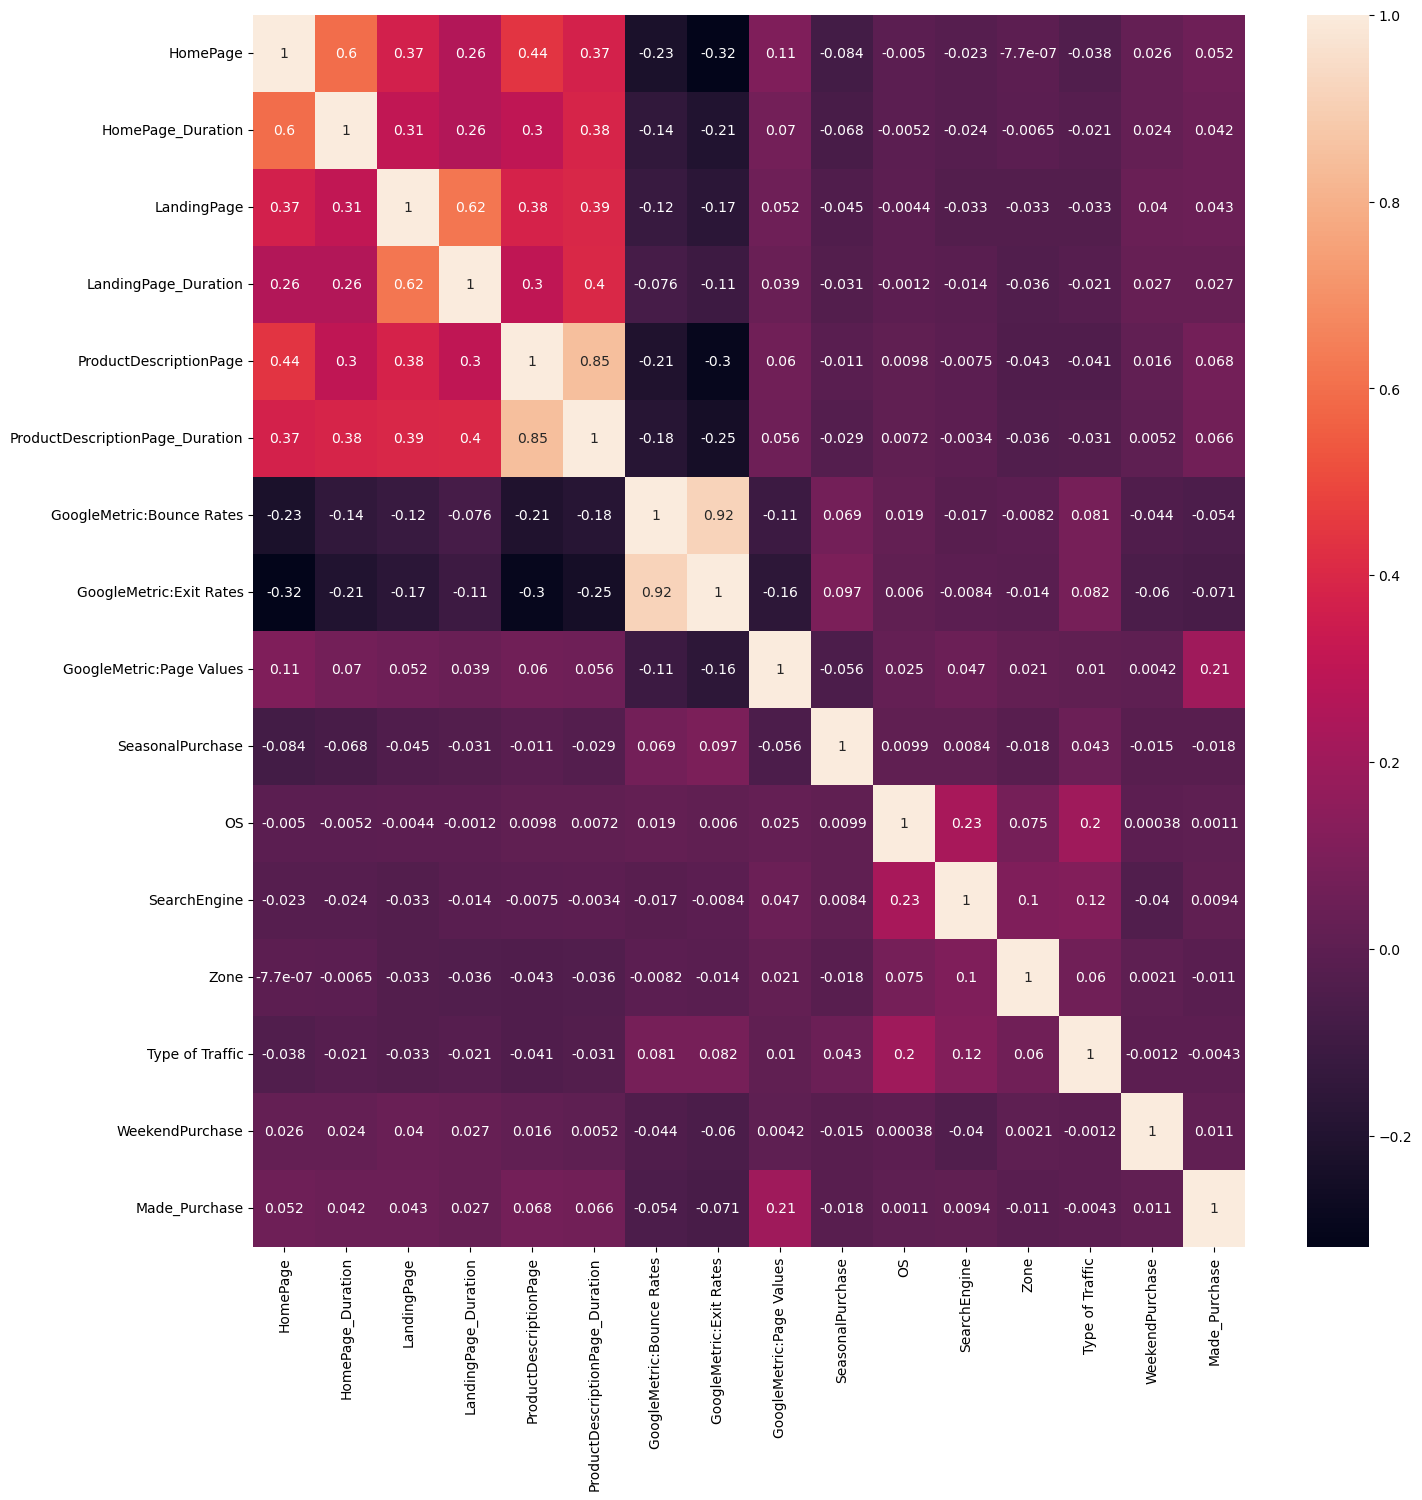

In [15]:
correl=Data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(data=correl, annot=True)
plt.show()

# Encoding Categorical Features of Train Data

In [16]:
oenc=OrdinalEncoder(categories='auto')
Data['Month_SeasonalPurchase']=oenc.fit_transform(Data['Month_SeasonalPurchase'].values.reshape(-1,1))



ohe=OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)
Data['Gender']=ohe.fit_transform(Data['Gender'].values.reshape(-1,1))
Data['Marital Status']=ohe.fit_transform(Data['Marital Status'].values.reshape(-1,1))
Data['Education']=ohe.fit_transform(Data['Education'].values.reshape(-1,1)) 
Data['CustomerType']=ohe.fit_transform(Data['CustomerType'].values.reshape(-1,1))
Data['Cookies Setting']=ohe.fit_transform(Data['Cookies Setting'].values.reshape(-1,1))


In [17]:
label_enc=LabelEncoder()
Data['Made_Purchase']=label_enc.fit_transform(Data['Made_Purchase'])

In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  float64
 11  OS                               14597 non-null  float64
 12  SearchEngine      

# Displaying Data Metrics

In [19]:
Data.describe()


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,...,14609.000000,14614.000000,14588.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14610.000000,14731.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,...,2.356629,3.155673,4.090143,0.130677,0.327812,0.322857,0.247980,0.321092,0.234155,0.384631
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,...,1.721823,2.405155,4.040147,0.337058,0.469432,0.467584,0.431855,0.466912,0.423484,0.486524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,...,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,...,2.000000,4.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dropping Target Variable

In [20]:
y=Data['Made_Purchase']
X=Data.drop('Made_Purchase', axis=1)
y.unique()

array([0, 1])

In [21]:
y.value_counts()

0    9065
1    5666
Name: Made_Purchase, dtype: int64

# Imputation of Train Data

In [22]:
si=SimpleImputer(missing_values=np.nan, strategy='median')
X_new=si.fit_transform(X,y)
print(X_new.shape)

(14731, 21)


# Checking Null Values Again of Train Data

In [23]:
X_new=pd.DataFrame(X_new,columns=X.columns)

In [24]:
X_new.isnull().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
OS                                 0
SearchEngine                       0
Zone                               0
Type of Traffic                    0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
dtype: int64

In [25]:
X_new=pd.DataFrame(X_new, columns=X.columns)

In [26]:
print('number of unique values in Month_SeasonalPurchase:',X_new['Month_SeasonalPurchase'].unique())
print('number of unique values in customer type:',X_new['CustomerType'].unique())
print('number of unique values in Gender:',X_new['Gender'].unique())
print('number of unique values in Cookies Setting:',X_new['Cookies Setting'].unique())
print('number of unique values in Education:',X_new['Education'].unique())
print('number of unique values in Marital Status:',X_new['Marital Status'].unique())

number of unique values in Month_SeasonalPurchase: [2. 5. 6. 8. 4. 3. 0. 7. 9. 1.]
number of unique values in customer type: [0. 1.]
number of unique values in Gender: [0. 1.]
number of unique values in Cookies Setting: [0. 1.]
number of unique values in Education: [0. 1.]
number of unique values in Marital Status: [0. 1.]


# KDE Plot before Scaling of Features of Train Data

<AxesSubplot:ylabel='Density'>

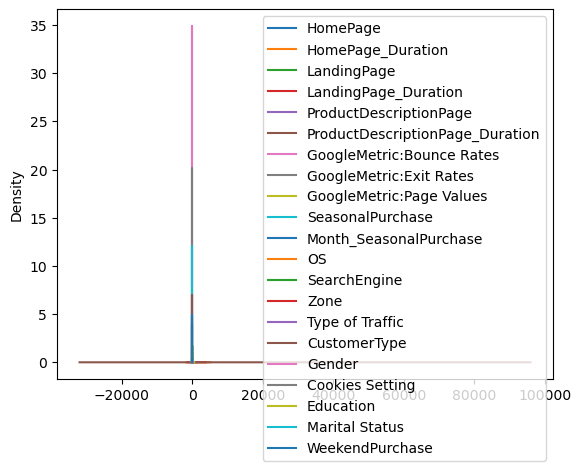

In [27]:
# Checking whether the features are on same scale or not 

X_new.plot.kde()

# Feature Selection

In [28]:
sfs=SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1500))
X_new_sfs=sfs.fit_transform(X_new,y)
 

In [29]:
feature_names=X_new.columns

In [30]:
feature_names

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object')

# Selected Features

In [31]:
feature_names_out=sfs.get_feature_names_out(feature_names)
feature_names_out

array(['GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'OS', 'SearchEngine',
       'Type of Traffic', 'CustomerType', 'Education', 'Marital Status',
       'WeekendPurchase'], dtype=object)

In [32]:
X_new_sfs=pd.DataFrame(X_new_sfs, columns=list(feature_names_out))

# Scaling of Selected Features

In [33]:
ss=StandardScaler()
X_new_sfs=ss.fit_transform(X_new_sfs,y)
X_new_sfs.shape

(14731, 10)

In [34]:
X_new_sfs=pd.DataFrame(X_new_sfs, columns=list(feature_names_out))

# KDE Plot of Selected Features

<AxesSubplot:ylabel='Density'>

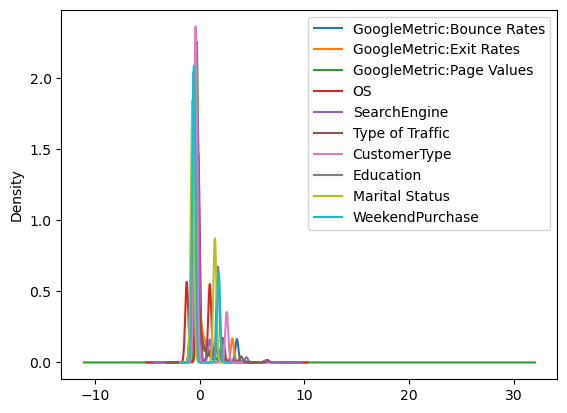

In [35]:
X_new_sfs.plot.kde()

# Splitting of Train Dataset

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X_new_sfs, y, test_size=0.2, random_state=42,shuffle=True)

In [37]:
y_train.value_counts()

0    7180
1    4604
Name: Made_Purchase, dtype: int64

# Estimator 

In [38]:
lr=LogisticRegression()

# Training Model without Parameters

In [39]:
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred=lr.predict(X_test)
score_value=lr.score(X_test, y_test)
score_value

0.6766202918221921

# Trained Model Metrics 

**Classification Report**

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79      1885
           1       0.71      0.18      0.28      1062

    accuracy                           0.68      2947
   macro avg       0.69      0.57      0.54      2947
weighted avg       0.69      0.68      0.61      2947



**Confusion Matrix Display**

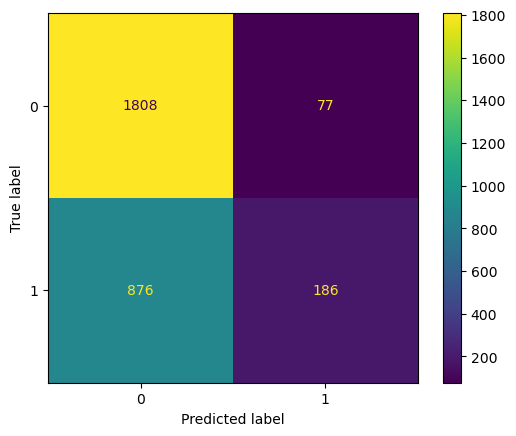

In [42]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.5g')
cm_display

# HYPERPARAMETER TUNING

In [43]:
?LogisticRegression

# Training the Model using Hyperparameter tuning

In [44]:
param_grid={'penalty':['l2'], 'solver':['lbfgs', 'saga', 'sag','newton-cg'], 'warm_start':[True,False],
           'max_iter':[100,200,400,500], 'fit_intercept':[True, False]}

In [45]:
lr_grid_search=GridSearchCV(lr, param_grid=param_grid, cv=5)

In [46]:
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 200, 400, 500], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga', 'sag', 'newton-cg'],
                         'warm_start': [True, False]})

In [47]:
lr_grid_search.best_params_

{'fit_intercept': False,
 'max_iter': 200,
 'penalty': 'l2',
 'solver': 'saga',
 'warm_start': False}

In [48]:
y_hpt_pred=lr_grid_search.predict(X_test)

In [49]:
score_hpt=lr_grid_search.score(X_test, y_test)
score_hpt

0.6874787919918561

**Accuracy Score**

In [50]:
acc_score=accuracy_score(y_test, y_hpt_pred)
acc_score

0.6874787919918561

**f1 score**

In [51]:
f1_score=f1_score(y_test, y_hpt_pred)
f1_score

0.3944773175542407

# Hyperparameter Trained Model Metrics

**Classification Report**

In [52]:
print(classification_report(y_test, y_hpt_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79      1885
           1       0.65      0.28      0.39      1062

    accuracy                           0.69      2947
   macro avg       0.67      0.60      0.59      2947
weighted avg       0.68      0.69      0.65      2947



**Confusion Matrix**

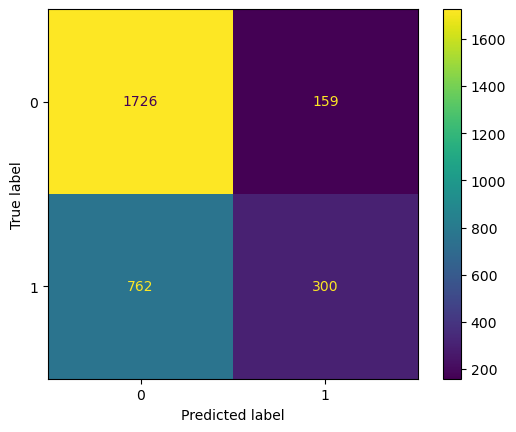

In [53]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_hpt_pred, values_format='.5g'))

# Loading Test Dataset

In [54]:
df_test=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [55]:
df_test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [56]:
df_test.shape

(6599, 21)

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  Month_SeasonalPurchase           6541 non-null   object 
 11  OS                               6537 non-null   float64
 12  SearchEngine        

# Encoding of Categorical Features of Test Data

In [58]:
oenc=OrdinalEncoder(categories='auto')
df_test['Month_SeasonalPurchase']=oenc.fit_transform(df_test['Month_SeasonalPurchase'].values.reshape(-1,1))

ohe=OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)
df_test['Gender']=ohe.fit_transform(df_test['Gender'].values.reshape(-1,1))
df_test['Marital Status']=ohe.fit_transform(df_test['Marital Status'].values.reshape(-1,1))
df_test['Education']=ohe.fit_transform(df_test['Education'].values.reshape(-1,1)) 
df_test['CustomerType']=ohe.fit_transform(df_test['CustomerType'].values.reshape(-1,1))
df_test['Cookies Setting']=ohe.fit_transform(df_test['Cookies Setting'].values.reshape(-1,1))


df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  Month_SeasonalPurchase           6541 non-null   float64
 11  OS                               6537 non-null   float64
 12  SearchEngine        

# Checking Null Values of Test Data

In [59]:
df_test.isnull().sum()

HomePage                           51
HomePage_Duration                  55
LandingPage                        56
LandingPage_Duration               75
ProductDescriptionPage             58
ProductDescriptionPage_Duration    63
GoogleMetric:Bounce Rates          66
GoogleMetric:Exit Rates            51
GoogleMetric:Page Values           45
SeasonalPurchase                   45
Month_SeasonalPurchase             58
OS                                 62
SearchEngine                       58
Zone                               47
Type of Traffic                    68
CustomerType                        0
Gender                              0
Cookies Setting                     0
Education                           0
Marital Status                      0
WeekendPurchase                    58
dtype: int64

# Replacing Null Values of Test Data

In [60]:
df_test.replace('?', np.nan, inplace=True)

# Imputation of Test Data

In [61]:
df_test_new=si.transform(df_test)

In [62]:
df_test_new=pd.DataFrame(df_test_new, columns=df_test.columns)

In [63]:
df_test_new.isnull().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
OS                                 0
SearchEngine                       0
Zone                               0
Type of Traffic                    0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
dtype: int64

In [64]:
feature_names_out

array(['GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'OS', 'SearchEngine',
       'Type of Traffic', 'CustomerType', 'Education', 'Marital Status',
       'WeekendPurchase'], dtype=object)

In [65]:
df_test_final=df_test_new.loc[:,list(feature_names_out)]

In [66]:
df_test_final.head()

,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,OS,SearchEngine,Type of Traffic,CustomerType,Education,Marital Status,WeekendPurchase
0,0.200000,0.200000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.100000,0.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0
2,0.015789,0.024561,0.0,2.0,2.0,3.0,0.0,1.0,0.0,0.0
3,0.000000,0.100000,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0
4,0.018750,0.025833,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0


In [67]:
df_test_final=ss.transform(df_test_final)

In [68]:
df_test_final=pd.DataFrame(df_test_final, columns=list(feature_names_out))

In [69]:
y_test_pred_1=lr_grid_search.predict(df_test_final)

In [70]:
final_df=pd.DataFrame()

In [71]:
final_df['id']=np.arange(0,6599)

In [72]:
final_df['Made_Purchase']=y_test_pred_1

In [73]:
final_df.head()

,id,Made_Purchase
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [74]:
final_df['Made_Purchase']=final_df['Made_Purchase'].astype('bool')

In [75]:
final_df.head()

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [76]:
np.unique(final_df,return_counts=True)

(array([0, True, 2, ..., 6596, 6597, 6598], dtype=object),
 array([5580, 1021,    1, ...,    1,    1,    1]))

In [77]:
final_df.to_csv('submission.csv', index=False)

In [78]:
final_df

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
6594,6594,False
6595,6595,False
6596,6596,False
6597,6597,False
